# K-Means Clutering

This anomaly detection method divides the data into clusters. Data points that are exceptionally far (>6x mean distance from centroid) from their cluster's centroid are considered to be outliers. This method is simple and computationally efficient, but is quite sensitive to the choice of initial centroids and k (number of clusters). Therefore we use k-means++ to initialize the centroids and find that k = 5 works best for this case.

In [87]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [88]:
data = pd.read_csv('intc_data.csv')

In [89]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


C:\Users\Tejas Srivatsav\AppData\Local\Temp\ipykernel_7716\3785880456.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [90]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [91]:
# Perform k-means
kmeans = KMeans(n_clusters=5, init='k-means++') 
kmeans.fit(data[indicators])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(data[indicators] - centroids[labels], axis=1)

# Threshold distance from centroid
threshold = 6 * np.std(distances)

# Identify outliers
outliers = data[distances > threshold]

In [92]:
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 709 to 3993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          39 non-null     object 
 1   Open          39 non-null     float64
 2   High          39 non-null     float64
 3   Low           39 non-null     float64
 4   Close         39 non-null     float64
 5   Volume        39 non-null     float64
 6   Dividends     39 non-null     float64
 7   Stock Splits  39 non-null     float64
 8   Return        39 non-null     float64
 9   SMA_50        39 non-null     float64
 10  EMA_20        39 non-null     float64
 11  WMA_30        39 non-null     float64
 12  RSI           39 non-null     float64
 13  Upper_BB      39 non-null     float64
 14  Lower_BB      39 non-null     float64
 15  MACD          39 non-null     float64
 16  Signal_Line   39 non-null     float64
dtypes: float64(16), object(1)
memory usage: 5.5+ KB
None


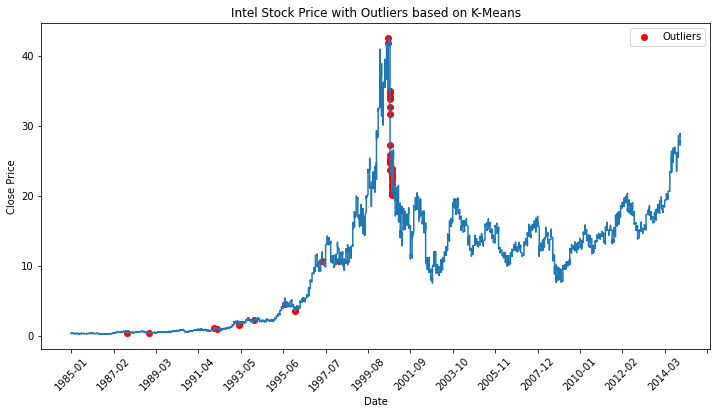

In [93]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on K-Means')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Based on how it was tuned, the K-Means method seems to find similar patterns to the one-class svm but is more sensitive to outliers. Days from the Dot-Com crash are mostly identified, along with several days interspersed in the years beforehand.  